Epoch 1/600
9/9 [==============================] - 1s 21ms/step - loss: 596.3204 - mae: 22.6753 - val_loss: 562.9000 - val_mae: 21.6156
Epoch 2/600
9/9 [==============================] - 0s 8ms/step - loss: 552.5754 - mae: 21.7086 - val_loss: 518.7602 - val_mae: 20.6106
Epoch 3/600
9/9 [==============================] - 0s 7ms/step - loss: 503.2984 - mae: 20.5590 - val_loss: 457.7027 - val_mae: 19.1192
Epoch 4/600
9/9 [==============================] - 0s 8ms/step - loss: 428.9454 - mae: 18.6975 - val_loss: 358.7175 - val_mae: 16.5071
Epoch 5/600
9/9 [==============================] - 0s 7ms/step - loss: 308.8463 - mae: 15.4395 - val_loss: 218.7689 - val_mae: 12.2235
Epoch 6/600
9/9 [==============================] - 0s 6ms/step - loss: 171.2499 - mae: 10.8011 - val_loss: 101.8594 - val_mae: 7.8001
Epoch 7/600
9/9 [==============================] - 0s 6ms/step - loss: 98.4210 - mae: 7.8153 - val_loss: 90.8850 - val_mae: 7.1229
Epoch 8/600
9/9 [==============================] - 0s 7ms/s

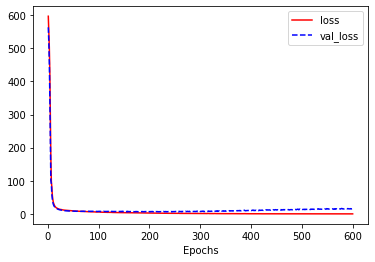

9/9 [==============================] - 0s 2ms/step - loss: 0.1834 - mae: 0.3076

{'loss': 0.18343818187713623, 'mae': 0.30759239196777344}


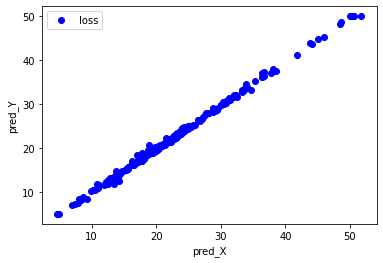

In [ ]:
import tensorflow as tf
import keras.preprocessing
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras.datasets import boston_housing



# 데이터 불러오기 train 404개 / test 102개
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


# 데이터 정규화 (z-score)

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

#mean = test_data.mean(axis=0)
test_data -= mean
#std = test_data.std(axis=0)
test_data /= std
# print(train_data, sep = '\n')
# print(train_targets, sep = '\n')

# print(test_data, sep = '\n')
# print(test_targets, sep = '\n')

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=["mae"])
    return model


#검증 데이터 분리
vaildation_split = 0.3
vaildation_split = math.ceil(len(train_data)* 0.3)

val_data = train_data[:vaildation_split]
val_targets = train_targets[:vaildation_split]

partial_train_data = train_data[vaildation_split:]
partial_train_targets = train_targets[vaildation_split:]

# 모델 학습
num_epochs = 600
batch = 32

all_scores = []
all_mae_histories = []
all_loss_histories = []
all_val_loss_histories = []

model = build_model()

#print(model.summary())
history = model.fit(partial_train_data, partial_train_targets, 
                    validation_data=(val_data, val_targets), 
                    epochs=num_epochs, batch_size=batch, verbose=1)



#mae_history = history.history['val_mean_absolute_error']
loss_history =  history.history['loss']
val_loss_history =  history.history['val_loss']

#all_mae_histories.append(mae_history)
all_loss_histories.append(loss_history)
all_val_loss_histories.append(val_loss_history)
    
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)


#average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
all_loss_histories = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
all_val_loss_histories = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]

#import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(range(1, len(all_loss_histories) + 1), all_loss_histories, 'r', label='loss')
plt.plot(range(1, len(all_val_loss_histories) + 1), all_val_loss_histories, 'b--', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('')
plt.legend(['loss', 'val_loss'])
plt.show()


#print(model.summary())

loss_and_metrics  = model.evaluate(partial_train_data,partial_train_targets, batch_size = batch, return_dict = True)
print('')
print(loss_and_metrics)

xhat = partial_train_data
yhat = model.predict(xhat)

# for i in range(len(yhat)):
#     print('True : ' + str(test_targets[i]) + ', Predict : ' + str(yhat[i]))


plt.figure(1)
plt.plot(yhat, partial_train_targets, 'bo', label='loss')
#plt.plot(range(1, len(all_val_loss_histories) + 1), all_val_loss_histories, 'b--', label='val_loss')
plt.xlabel('pred_X')
plt.ylabel('pred_Y')
plt.legend(['loss', 'val_loss'])
plt.show()

65536/57026 [==================================] - 0s 0us/step
Epoch 1/600
9/9 [==============================] - 1s 19ms/step - loss: 581.5782 - mae: 22.4126 - val_loss: 553.7339 - val_mae: 21.4654
Epoch 2/600
9/9 [==============================] - 0s 6ms/step - loss: 541.0170 - mae: 21.5048 - val_loss: 509.4020 - val_mae: 20.4187
Epoch 3/600
9/9 [==============================] - 0s 6ms/step - loss: 485.5480 - mae: 20.1546 - val_loss: 437.1249 - val_mae: 18.6020
Epoch 4/600
9/9 [==============================] - 0s 3ms/step - loss: 390.6190 - mae: 17.7582 - val_loss: 313.9043 - val_mae: 15.2523
Epoch 5/600
9/9 [==============================] - 0s 4ms/step - loss: 243.7940 - mae: 13.5919 - val_loss: 153.5471 - val_mae: 10.1674
Epoch 6/600
9/9 [==============================] - 0s 4ms/step - loss: 109.8888 - mae: 8.8222 - val_loss: 63.9831 - val_mae: 6.2611
Epoch 7/600
9/9 [==============================] - 0s 8ms/step - loss: 70.0904 - mae: 6.6062 - val_loss: 58.2352 - val_mae: 5.645

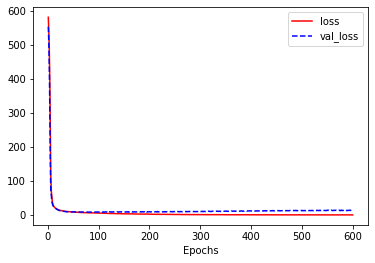

4/4 [==============================] - 0s 2ms/step - loss: 24.0355 - mae: 2.7711

{'loss': 24.03545379638672, 'mae': 2.7711074352264404}


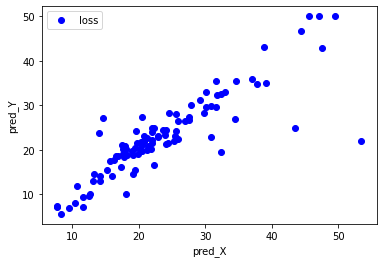

In [1]:
import tensorflow as tf
import keras.preprocessing
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras.datasets import boston_housing



# 데이터 불러오기 train 404개 / test 102개
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


# 데이터 정규화 (z-score)

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

#mean = test_data.mean(axis=0)
test_data -= mean
#std = test_data.std(axis=0)
test_data /= std
# print(train_data, sep = '\n')
# print(train_targets, sep = '\n')

# print(test_data, sep = '\n')
# print(test_targets, sep = '\n')

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=["mae"])
    return model


#검증 데이터 분리
vaildation_split = 0.3
vaildation_split = math.ceil(len(train_data)* 0.3)

val_data = train_data[:vaildation_split]
val_targets = train_targets[:vaildation_split]

partial_train_data = train_data[vaildation_split:]
partial_train_targets = train_targets[vaildation_split:]

# 모델 학습
num_epochs = 600
batch = 32

all_scores = []
all_mae_histories = []
all_loss_histories = []
all_val_loss_histories = []

model = build_model()

#print(model.summary())
history = model.fit(partial_train_data, partial_train_targets, 
                    validation_data=(val_data, val_targets), 
                    epochs=num_epochs, batch_size=batch, verbose=1)



#mae_history = history.history['val_mean_absolute_error']
loss_history =  history.history['loss']
val_loss_history =  history.history['val_loss']

#all_mae_histories.append(mae_history)
all_loss_histories.append(loss_history)
all_val_loss_histories.append(val_loss_history)
    
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)


#average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
all_loss_histories = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
all_val_loss_histories = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]

#import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(range(1, len(all_loss_histories) + 1), all_loss_histories, 'r', label='loss')
plt.plot(range(1, len(all_val_loss_histories) + 1), all_val_loss_histories, 'b--', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('')
plt.legend(['loss', 'val_loss'])
plt.show()


#print(model.summary())

loss_and_metrics  = model.evaluate(test_data,test_targets, batch_size = batch, return_dict = True)
print('')
print(loss_and_metrics)

xhat = test_data
yhat = model.predict(xhat)

# for i in range(len(yhat)):
#     print('True : ' + str(test_targets[i]) + ', Predict : ' + str(yhat[i]))


plt.figure(1)
plt.plot(yhat, test_targets, 'bo', label='loss')
#plt.plot(range(1, len(all_val_loss_histories) + 1), all_val_loss_histories, 'b--', label='val_loss')
plt.xlabel('pred_X')
plt.ylabel('pred_Y')
plt.legend(['loss', 'val_loss'])
plt.show()